# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Objective

Develop a model that could predict crop yield based on various factors like area, production , fertilizer and more features

# Importing the dataset

In [2]:
dataset = pd.read_csv('crop_yield_data.csv')

# EDA (Exploratory Data Analysis)

Crop – category (name of the crop)

Crop_Year – year (YYYY)

Season – category (e.g., Kharif, Rabi, Whole Year)

State – category (Indian state name)

Area – hectares (ha)

Production – tonnes (t)

Annual_Rainfall – millimeters (mm)

Fertilizer – kilograms (kg) of fertilizer applied

Pesticide – kilograms (kg) of active ingredient applied

Yield – tonnes per hectare (t/ha)

In [3]:
dataset.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


Crop,season,State column data type is object , so label encoder must be used

In [ ]:
print(dataset['Crop'].nunique())
print(dataset['Crop'].unique())

55
['Arecanut' 'Arhar/Tur' 'Castor seed' 'Coconut ' 'Cotton(lint)'
 'Dry chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger seed'
 'Onion' 'Other  Rabi pulses' 'Potato' 'Rapeseed &Mustard' 'Rice'
 'Sesamum' 'Small millets' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Tobacco'
 'Turmeric' 'Wheat' 'Bajra' 'Black pepper' 'Cardamom' 'Coriander' 'Garlic'
 'Ginger' 'Groundnut' 'Horse-gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana'
 'Soyabean' 'Barley' 'Khesari' 'Masoor' 'Moong(Green Gram)'
 'Other Kharif pulses' 'Safflower' 'Sannhamp' 'Sunflower' 'Urad'
 'Peas & beans (Pulses)' 'other oilseeds' 'Other Cereals' 'Cowpea(Lobia)'
 'Oilseeds total' 'Guar seed' 'Other Summer Pulses' 'Moth']


In [ ]:
print(dataset['Season'].nunique())
print(dataset['Season'].unique())

6
['Whole Year ' 'Kharif     ' 'Rabi       ' 'Autumn     ' 'Summer     '
 'Winter     ']


In [ ]:
print(dataset['State'].nunique())
print(dataset['State'].unique())

30
['Assam' 'Karnataka' 'Kerala' 'Meghalaya' 'West Bengal' 'Puducherry' 'Goa'
 'Andhra Pradesh' 'Tamil Nadu' 'Odisha' 'Bihar' 'Gujarat' 'Madhya Pradesh'
 'Maharashtra' 'Mizoram' 'Punjab' 'Uttar Pradesh' 'Haryana'
 'Himachal Pradesh' 'Tripura' 'Nagaland' 'Chhattisgarh' 'Uttarakhand'
 'Jharkhand' 'Delhi' 'Manipur' 'Jammu and Kashmir' 'Telangana'
 'Arunachal Pradesh' 'Sikkim']


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Crop'] = le.fit_transform(dataset['Crop'])
dataset['Season'] = le.fit_transform(dataset['Season'])
dataset['State'] = le.fit_transform(dataset['State'])

In [ ]:
print(dataset['Crop'].nunique())
print(dataset['Crop'].unique())

55
[ 0  1  8  9 11 13 16 21 23 24 26 29 31 32 37 39 40 43 44 46 48 49 50 51
 53  2  5  6 10 14 15 17 19 20 38  7  3 45  4 22 25 27 34 41 42 47 52 36
 54 33 12 30 18 35 28]


0  →  Arecanut  
1  →  Arhar/Tur  
2  →  Bajra  
3  →  Banana  
4  →  Barley  
5  →  Black pepper  
6  →  Cardamom  
7  →  Cashewnut  
8  →  Castor seed  
9  →  Coconut  
10 →  Coriander  
11 →  Cotton(lint)  
12 →  Cowpea(Lobia)  
13 →  Dry chillies  
14 →  Garlic  
15 →  Ginger  
16 →  Gram  
17 →  Groundnut  
18 →  Guar seed  
19 →  Horse-gram  
20 →  Jowar  
21 →  Jute  
22 →  Khesari  
23 →  Linseed  
24 →  Maize  
25 →  Masoor  
26 →  Mesta  
27 →  Moong(Green Gram)  
28 →  Moth  
29 →  Niger seed  
30 →  Oilseeds total  
31 →  Onion  
32 →  other oilseeds  
33 →  Other Cereals  
34 →  Other Kharif pulses  
35 →  Other Rabi pulses  
36 →  Other Summer Pulses  
37 →  Peas & beans (Pulses)  
38 →  Potato  
39 →  Ragi  
40 →  Rapeseed &Mustard  
41 →  Rice  
42 →  Safflower  
43 →  Sannhamp  
44 →  Sesamum  
45 →  Small millets  
46 →  Soyabean  
47 →  Sugarcane  
48 →  Sunflower  
49 →  Sweet potato  
50 →  Tapioca  
51 →  Tobacco  
52 →  Turmeric  
53 →  Urad  
54 →  Wheat  


In [ ]:
print(dataset['Season'].nunique())
print(dataset['Season'].unique())

6
[4 1 2 0 3 5]


0 → Autumn  
1 → Kharif  
2 → Rabi  
3 → Summer  
4 → Whole Year  
5 → Winter


In [ ]:
print(dataset['State'].nunique())
print(dataset['State'].unique())

30
[ 2 12 13 17 29 21  6  0 24 20  3  7 14 15 18 22 27  8  9 26 19  4 28 11
  5 16 10 25  1 23]


0  → Andhra Pradesh  
1  → Arunachal Pradesh  
2  → Assam  
3  → Bihar  
4  → Chhattisgarh  
5  → Delhi  
6  → Goa  
7  → Gujarat  
8  → Haryana  
9  → Himachal Pradesh  
10 → Jammu and Kashmir  
11 → Jharkhand  
12 → Karnataka  
13 → Kerala  
14 → Madhya Pradesh  
15 → Maharashtra  
16 → Manipur  
17 → Meghalaya  
18 → Mizoram  
19 → Nagaland  
20 → Odisha  
21 → Puducherry  
22 → Punjab  
23 → Sikkim  
24 → Tamil Nadu  
25 → Telangana  
26 → Tripura  
27 → Uttar Pradesh  
28 → Uttarakhand  
29 → West Bengal


In [ ]:
dataset.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,1997,4,2,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,1,1997,1,2,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,8,1997,1,2,796.0,22,2051.4,75755.32,246.76,0.238333
3,9,1997,4,2,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,11,1997,1,2,1739.0,794,2051.4,165500.63,539.09,0.420909


# Setting Feature and Target

In [5]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
dataset.describe()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,19689.000000,19689.000000,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,29.357662,2009.127584,2.037381,14.328813,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,15.560857,6.498099,1.222513,9.000461,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,0.000000,1997.000000,0.000000,0.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,17.000000,2004.000000,1.000000,7.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,31.000000,2010.000000,2.000000,14.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,43.000000,2015.000000,3.000000,22.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,54.000000,2020.000000,5.000000,29.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


data will have to be normalised

In [ ]:
dataset.shape

(19689, 10)

19689 rows and 10 columns

In [ ]:
dataset.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


there are no missing values after all

<Axes: >

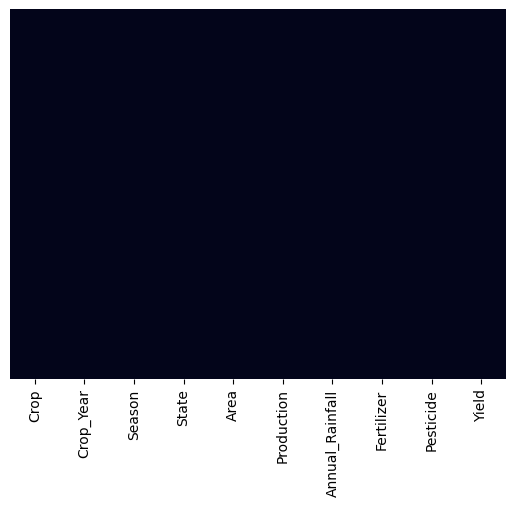

In [ ]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

visualisation of null values

# Check correlation of the feature with target -- 'label'

In [ ]:
print(dataset.corr(numeric_only=True)['Yield'].abs().sort_values(ascending=False))

Yield              1.000000
Production         0.570809
Season             0.141791
Crop               0.110894
Annual_Rainfall    0.020761
State              0.009668
Fertilizer         0.002862
Crop_Year          0.002539
Area               0.001858
Pesticide          0.001782
Name: Yield, dtype: float64


The correlation with the target ranges from weak to moderate. Pesticide,Area,Crop_year,Fertilizer doesn't seem to have much affect on each yield

Text(0.5, 1.0, 'correlation between variables')

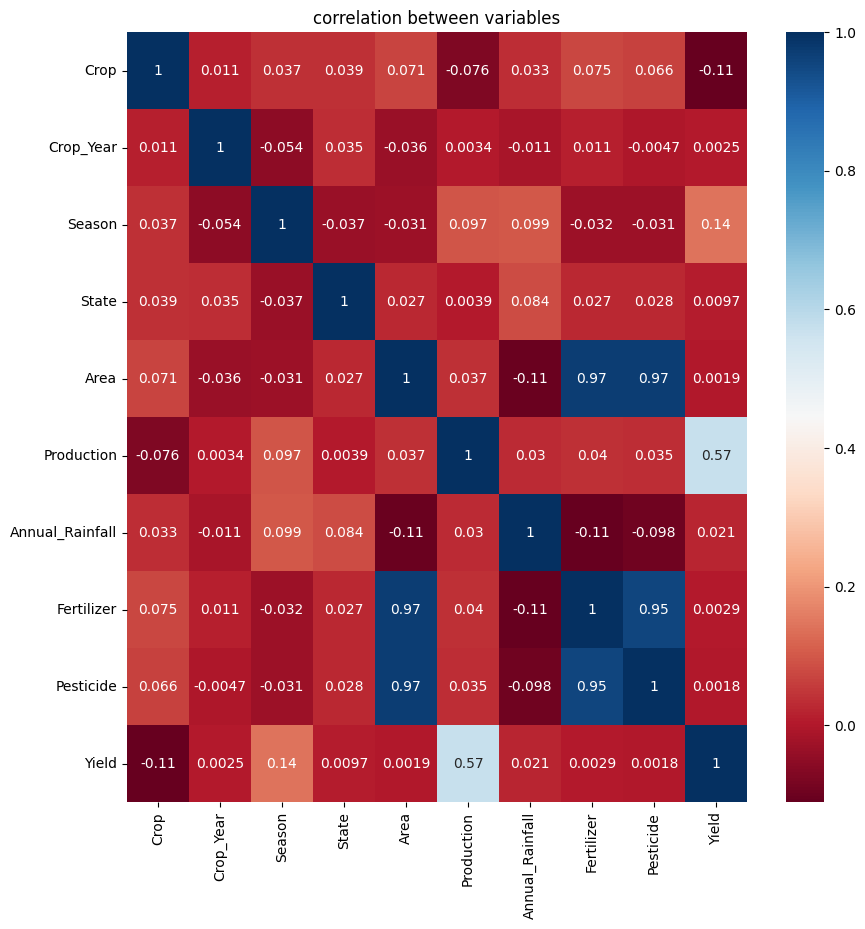

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(numeric_only=True),annot=True,cmap="RdBu")
plt.title('correlation between variables')

# Data Visualization

# Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
print (X)

[[-1.88668324 -1.86637538  1.60543717 ...  0.75119746 -0.17987979
  -0.12174502]
 [-1.82241779 -1.86637538 -0.84858584 ...  0.75119746 -0.24721699
  -0.21938512]
 [-1.37255967 -1.86637538 -0.84858584 ...  0.75119746 -0.25307192
  -0.22787487]
 ...
 [-0.34431252 -1.86637538 -0.84858584 ... -0.09983632  0.05775453
   0.22282889]
 [ 0.68393463 -1.86637538 -0.84858584 ... -0.09983632  0.02253374
   0.17175813]
 [ 1.51938544 -1.86637538 -0.03057817 ... -0.09983632 -0.01395506
   0.11884873]]


# Split the dataset into training set and test set

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print(X_train)

[[ 0.16981106 -0.78910989 -0.03057817 ... -0.39179771 -0.22650513
  -0.20541985]
 [-0.66563975  1.21152603 -0.03057817 ... -0.19421881 -0.25379519
  -0.22895166]
 [ 1.06952731 -0.32742468  1.60543717 ... -0.5307395   0.09317625
  -0.04373719]
 ...
 [-0.53710886 -0.48131975 -0.84858584 ... -0.44737443 -0.24767153
  -0.22427869]
 [-1.17976333 -0.17352961 -0.84858584 ...  0.12626543 -0.25370409
  -0.22898542]
 [-0.66563975 -0.17352961  1.60543717 ... -0.28872371 -0.18645192
  -0.2101488 ]]


In [ ]:
print(y_train)

[ 0.12038462  0.4        83.4125     ...  1.97690476  0.53
  0.45923077]


In [ ]:
print(X_test)

[[ 1.06952731e+00  1.34260533e-01  1.60543717e+00 ...  2.07377642e+00
  -2.48892459e-01 -2.25830538e-01]
 [ 1.19805820e+00  9.03735885e-01  1.60543717e+00 ...  8.78387347e-01
  -2.44828670e-01 -2.20620995e-01]
 [-8.58436093e-01 -1.55858524e+00 -3.05781729e-02 ... -6.30385861e-01
  -2.44610898e-01 -2.18546135e-01]
 ...
 [ 1.19805820e+00 -4.81319749e-01  1.60543717e+00 ...  4.12718115e-01
  -2.42958246e-01 -2.20664318e-01]
 [-9.86966987e-01  1.34260533e-01 -8.48585845e-01 ... -1.44395627e-01
  -2.53864566e-01 -2.29028458e-01]
 [ 4.12801618e-02  1.51931617e+00 -3.05781729e-02 ... -6.59275960e-01
   1.39054724e-03  1.57474498e-02]]


In [ ]:
print(y_test)

[41.51714286  5.39925926  0.51461539 ...  3.40666667  1.33
  1.72076923]




---



## Training on Different models

# 1.A Random Forest model

In [8]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=100,random_state=0)
RF.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [9]:
RF_y_pred = RF.predict(X_test)
print(RF_y_pred)

[51.02399482  5.02279204  0.68090751 ...  3.37344824  1.1476
  2.04923352]


In [10]:
RF_mse = mean_squared_error(y_test, RF_y_pred)
RF_mae = mean_absolute_error(y_test, RF_y_pred)
RF_r2 = r2_score(y_test, RF_y_pred)

print("Mean Squared Error:", RF_mse)
print("Mean Absolute Error:", RF_mae)
print("R² Score:", RF_r2)

Mean Squared Error: 48055.616040878245
Mean Absolute Error: 9.475868720966414
R² Score: 0.9380215126568717


predicting a new result


In [11]:
RF_encoded_result = RF.predict(sc.transform([[29,1997,1,13,1739,794,2051.4,165500.63,539.09]]))

In [12]:
print(RF_encoded_result)

[0.44375757]


predicted value - 0.44375757

real value - 0.420909091

Applying K-Fold cross validation

In [ ]:
RF_r2_scores = cross_val_score(estimator=RF, X=X_train, y=y_train, cv=10, scoring='r2')
print("Average R²:", RF_r2_scores.mean())

Average R²: 0.970249282832086


# 2.A Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(criterion='poisson',max_depth=5, min_samples_split=10, min_samples_leaf=5,random_state = 0)
DT.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=5, min_samples_leaf=5,
                      min_samples_split=10, random_state=0)

In [ ]:
DT_y_pred = DT.predict(X_test)

In [ ]:
DT_mse = mean_squared_error(y_test,DT_y_pred)
DT_mae = mean_absolute_error(y_test,DT_y_pred)
DT_r2 = r2_score(y_test,DT_y_pred)

print("Mean Squared Error:", DT_mse)
print("Mean Absolute Error:", DT_mae)
print("R² Score:", DT_r2)

Mean Squared Error: 89190.97771970076
Mean Absolute Error: 13.993501319439769
R² Score: 0.884968244314683


In [ ]:
DT_encoded_result = DT.predict(sc.transform([[29,1997,1,13,1739,794,2051.4,165500.63,539.09]]))

In [ ]:
print(DT_encoded_result)

[1.89690592]


predicted value - 1.89690592

real value - 0.420909091

Applying K-Fold cross validation

In [ ]:
DT_r2_scores = cross_val_score(estimator = DT, X = X_train, y = y_train , cv = 10, scoring = 'r2')
print("Average R²:", DT_r2_scores.mean())

Average R²: 0.9463631022557879


### Applying Grid Search

# 3.A Polynomial Regression model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y_train)

LinearRegression()

In [ ]:
poly_y_pred = lin_reg.predict(X_poly_test)

In [ ]:
poly_mse = mean_squared_error(y_test,poly_y_pred)
poly_mae = mean_absolute_error(y_test,poly_y_pred)
poly_r2 = r2_score(y_test,poly_y_pred)

print("Mean Squared Error:", poly_mse)
print("Mean Absolute Error:", poly_mae)
print("R² Score:", poly_r2)

Mean Squared Error: 406804.04306440795
Mean Absolute Error: 113.98967390334835
R² Score: 0.4753350115675675


### predicting new result

In [ ]:
scaled_result = sc.transform([[29,1997,1,13,1739,794,2051.4,165500.63,539.09]])

In [ ]:
new_poly = poly_reg.transform(scaled_result)

In [ ]:
print(lin_reg.predict(new_poly))

[-20.97390958]


predicted value - -20.97390958

real value - 0.420909091

Applying K-Fold Cross validation

In [ ]:
poly_r2_scores = cross_val_score(estimator = lin_reg, X = X_poly_train, y = y_train , cv = 10, scoring = 'r2')
print("Average R²:", poly_r2_scores.mean())

Average R²: 0.5484427929326415


# 4. A SVC model

In [ ]:
from sklearn.svm import SVR
SVM = SVR(kernel = 'linear')
SVM.fit(X_train,y_train)

SVR(kernel='linear')

In [ ]:
SVM_y_pred = SVM.predict(X_test)

In [ ]:
SVM_mse = mean_squared_error(y_test,SVM_y_pred)
SVM_mae = mean_absolute_error(y_test,SVM_y_pred)
SVM_r2 = r2_score(y_test,SVM_y_pred)

print("Mean Squared Error:", SVM_mse)
print("Mean Absolute Error:", SVM_mae)
print("R² Score:", SVM_r2)

Mean Squared Error: 579774.902529784
Mean Absolute Error: 58.22446981166544
R² Score: 0.2522503212165893


predicting a new result

In [ ]:
SVM_encoded_result =SVM.predict(sc.transform([[29,1997,1,13,1739,794,2051.4,165500.63,539.09]]))

In [ ]:
print(SVM_encoded_result)

[0.74292279]


predicted value - 0.74292279

real value - 0.420909091

Applying K-Fold cross validation

In [ ]:
SVM_r2_scores = cross_val_score(estimator = SVM, X = X_train, y = y_train , cv = 10, scoring = 'r2')
print("Average R²:", SVM_r2_scores.mean())

Average R²: 0.2761151784415151


# 5. K Nearest Neighbors Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors = 15)
KNN.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=15)

In [ ]:
KNN_y_pred = KNN.predict(X_test)

In [ ]:
KNN_mse = mean_squared_error(y_test,KNN_y_pred)
KNN_mae = mean_absolute_error(y_test,KNN_y_pred)
KNN_r2 = r2_score(y_test,KNN_y_pred)

print("Mean Squared Error:", KNN_mse)
print("Mean Absolute Error:", KNN_mae)
print("R² Score:", KNN_r2)

Mean Squared Error: 263748.8313914868
Mean Absolute Error: 48.72605628657105
R² Score: 0.6598367692496783


predicting new result

In [ ]:
KNN_encoded_result = KNN.predict(sc.transform([[29,1997,1,13,1739,794,2051.4,165500.63,539.09]]))

In [ ]:
print(KNN_encoded_result)

[1.49081164]


predicted value - 1.49081164

real value - 0.420909091

Applying K-Fold cross validation

In [ ]:
KNN_r2_scores = cross_val_score(estimator = KNN, X = X_train, y = y_train , cv = 10, scoring = 'r2')
print("Average R²:", KNN_r2_scores.mean())

Average R²: 0.7366144818146958


# 6.A XGBoost Model

In [ ]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
XGB_y_pred = XGB.predict(X_test)

In [ ]:
XGB_mse = mean_squared_error(y_test, XGB_y_pred)
XGB_mae = mean_absolute_error(y_test, XGB_y_pred)
XGB_r2 = r2_score(y_test, XGB_y_pred)

print("Mean Squared Error:", XGB_mse)
print("Mean Absolute Error:", XGB_mae)
print("R² Score:", XGB_r2)

Mean Squared Error: 15368.16754839321
Mean Absolute Error: 8.123780981242156
R² Score: 0.9801793035578833


predicting a new result

In [ ]:
XGB_encoded_result = XGB.predict(sc.transform([[29,1997,1,13,1739,794,2051.4,165500.63,539.09]]))

In [ ]:
print(XGB_encoded_result)

[0.57885337]


predicted value - 0.57885337

real value - 0.420909091

Applying K-Fold cross validation

In [ ]:
XGB_r2_scores = cross_val_score(estimator=XGB, X=X_train, y=y_train, cv=10, scoring='r2')
print("Average R²:", XGB_r2_scores.mean())

Average R²: 0.9582133705435671


Aplying Grid search

# Summary of scores

In [ ]:
scores = [RF_r2_scores,DT_r2_scores,poly_r2_scores,SVM_r2_scores,KNN_r2_scores,XGB_r2_scores]
algorithms = ["Random Forest","Decision Tree","polynomial Regression","Support Vector Machine","K-Nearest Neighbors","XGBoost"]

for i in range(len(algorithms)):
  print(f"The average r2 score achieved using the {algorithms[i]} is : {scores[i].mean():.2f}%")

The average r2 score achieved using the Random Forest is : 0.97%
The average r2 score achieved using the Decision Tree is : 0.95%
The average r2 score achieved using the polynomial Regression is : 0.55%
The average r2 score achieved using the Support Vector Machine is : 0.28%
The average r2 score achieved using the K-Nearest Neighbors is : 0.74%
The average r2 score achieved using the XGBoost is : 0.96%


# A comparison of the accuracy of the seven models

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

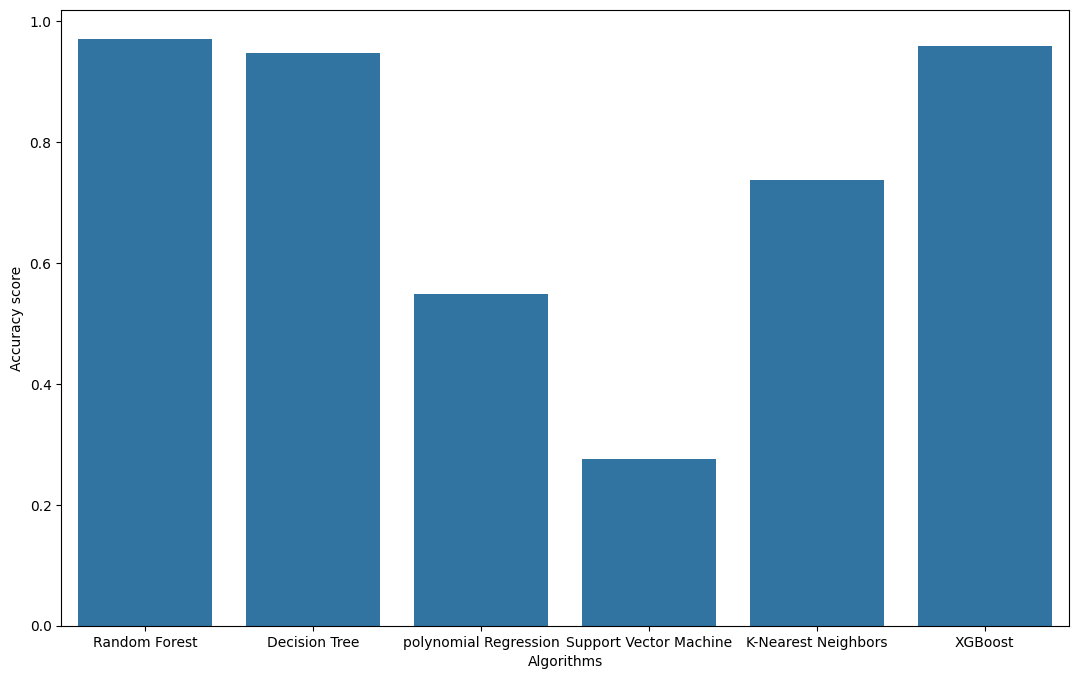

In [ ]:
plt.figure(figsize=(13,8))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

mean_scores = [score.mean() for score in scores]

sns.barplot(x=algorithms, y=mean_scores)

# Making a predictive system

In [ ]:
input_data = (29,1997,1,13,1739,794,2051.4,165500.63,539.09)

# changing the input_data to numpy array and reshaping
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

scaled_input = sc.transform(input_data_reshaped)

prediction = RF.predict(scaled_input)
print(prediction)

[0.44375757]


# Saving the trained model

In [13]:
import joblib

In [19]:
joblib.dump(sc, "Scaler(YP).joblib")
joblib.dump(le, "label_encoder(YP).joblib")
#loaded_model = pickle.load(open('Yield_Predictor.sav','rb'))
loaded_scaler = joblib.load("Scaler(YP).joblib")
loaded_le = joblib.load("label_encoder(YP).joblib")

In [23]:
joblib.dump(RF, "Yield_predictor_compressed.joblib",compress=3)

# --- Load back ---
loaded_rf_model = joblib.load("Yield_predictor_compressed.joblib")

In [24]:
input_data = (29,1997,1,13,1739,794,2051.4,165500.63,539.09)

# changing the input_data to numpy array and reshaping
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

scaled_input = loaded_scaler.transform(input_data_reshaped)

prediction = loaded_rf_model.predict(scaled_input)
print(prediction)

[0.44375757]
